# Primer modelo: Regresión lineal
Modelo para hacer la predicción de grados celsius a fahrenheit.

La regresión lineal es uno de los principales algoritmos en ML, se puede usar cuando tenemos datos que si son graficados muestran una relación que pueden ser representados con una línea.

<img src="Images/regresionLinealC-F.png">


In [9]:
import pandas as pd

datos = pd.read_csv('sample_data/celsius.csv')

**Se pueden utilizar algunas funciones de pandas para obtener información del conjunto de datos**

In [10]:
# Muestra información básica sobre el DataFrame
datos.info()

<class 'pandas.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   celsius     7 non-null      int64  
 1   fahrenheit  7 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 244.0 bytes


In [11]:
# Muestra las primeras n filas del DataFrame, por defecto n=5
datos.head()

,celsius,fahrenheit
0,-40,-40.0
1,-10,14.0
2,0,32.0
3,8,46.4
4,15,59.0


**Podemos crear una gráfica para visualizar los datos del conjunto**

<Axes: xlabel='celsius', ylabel='fahrenheit'>

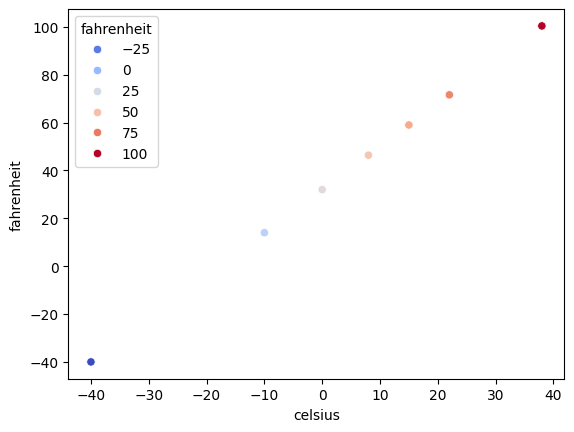

In [18]:
import seaborn as sb

sb.scatterplot(x="celsius", y="fahrenheit", data=datos,
               hue="fahrenheit", palette="coolwarm")

## Preparación de los datos

Separación en Características (X) y etiquetas (y)

Características = Datos de entrada
Etiqueta = Respuesta

In [25]:
X = datos[['celsius']]
y = datos['fahrenheit']

Se necesita hacer una transformación adicional forzosa, porque los modelos requieren cierto formato en los datos.
Actualmente los valores de la serie es una arreglo de tipo `array([-40,-10,8,15,22,38])`, sin embargo, los modelos con los que se van a trabajar, necesitan que los datos sean una arreglo de arreglos `array([[-40],[-10],[8],[15],[22],[38]])`, se necesita hacer porque normalmente los datos van a tener múltiples características.

In [28]:
X_procesada = X.values.reshape(-1, 1)
y_procesada = y.values.reshape(-1, 1)

## Creación del modelo con sklearn

In [29]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()

### Entrenamiento del modelo

In [30]:
modelo.fit(X_procesada, y_procesada)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


Como el modelo ya está entrenado, podemos probar haciendo predicciones, debido a que este ejemplo es muy simple, el modelo va a predecir de manera excesivamente exacta.

In [37]:
celsius = 100
preddiccion = modelo.predict([[celsius]])
print(f"La predicción para {celsius}°C es {preddiccion[0][0]}°F")

La predicción para 100°C es 211.99999999999997°F


### Evaluación del modelo (valor del 0-1)
Esto genera un valor entre 0-1 para decirnos que tan bien está entrenado nuestro modelo, como este modelo es muy sencillo nos va a generar un valor de 1, es decir, está entrenado perfectamente, pero normalmente jamás se va a llegar a este número ya que siempre va existir un cierto nivel de error en los modelos del mundo real.

In [35]:
modelo.score(X_procesada, y_procesada)

1.0